In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# DATASET_DIR = ".\dataset"
DATASET_DIR = os.path.join('.','dataset')

In [27]:
DATASET_DIR

'.\\dataset'

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
os.listdir(DATASET_DIR)


['covid', 'normal']

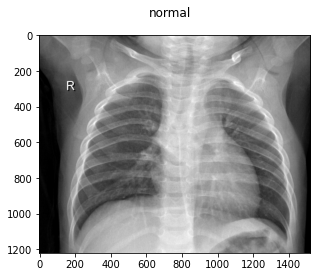

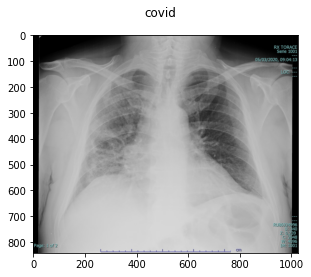

In [29]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(img_path)

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(mpimg.imread(normal_images[0]), cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(img_path)

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(mpimg.imread(covid_images[0]), cmap='gray') 

In [30]:
print(len(normal_images))
print(len(covid_images))

28
70


In [31]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [32]:
len(normal_images)

28

0
.\dataset/normal\IM-0214-0001.jpeg
1
.\dataset/normal\IM-0215-0001.jpeg
2
.\dataset/normal\IM-0216-0001.jpeg
3
.\dataset/normal\IM-0217-0001.jpeg


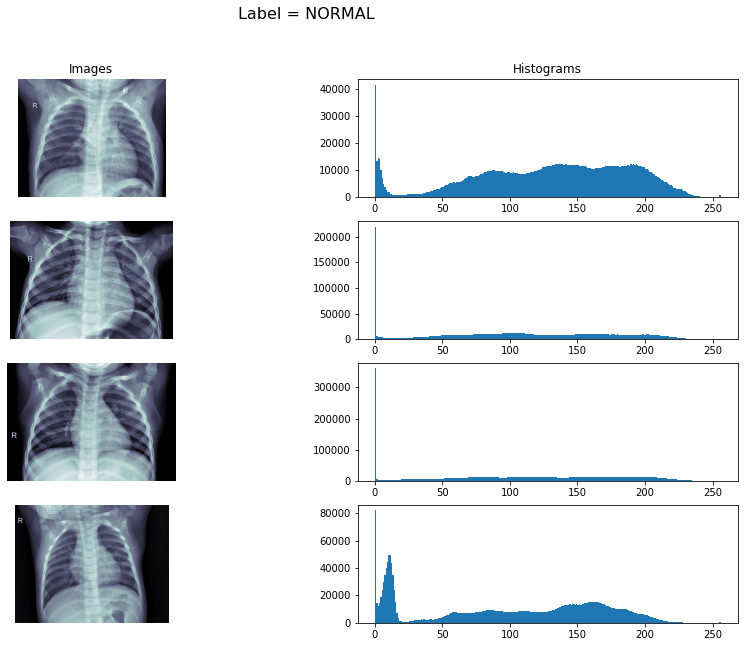

In [33]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


for row, imgfile in enumerate(normal_images[:4]):
    print(row)
    print(imgfile)
    image = plt.imread(imgfile)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

In [38]:
def show_images(paths,title):

    fig, ax = plt.subplots(4, 2, figsize=(15, 10))


    for row, imgfile in enumerate(normal_images[:4]):
        print(row)
        print(imgfile)
        image = plt.imread(imgfile)
        ax[row, 0].imshow(image, cmap=plt.cm.bone)
        ax[row, 1].hist(image.ravel(), 256, [0,256])
        ax[row, 0].axis('off')
        if row == 0:
            ax[row, 0].set_title('Images')
            ax[row, 1].set_title('Histograms')
    fig.suptitle(title, size=16)
    plt.show()

0
.\dataset/normal\IM-0214-0001.jpeg
1
.\dataset/normal\IM-0215-0001.jpeg
2
.\dataset/normal\IM-0216-0001.jpeg
3
.\dataset/normal\IM-0217-0001.jpeg


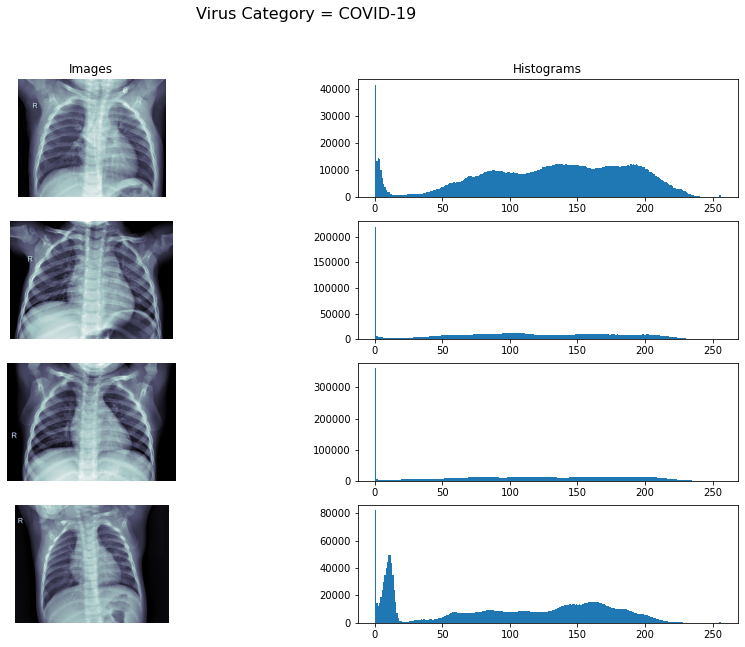

In [40]:
show_images(covid_images[:4],title='Virus Category = COVID-19')

In [41]:
# fig, ax = plt.subplots(4, 2, figsize=(15, 10))
# covid_images = []
# # for img_path in glob.glob(DATASET_DIR + '/covid/*'):
# for img_path in glob.glob(os.path.join(DATASET_DIR,'covid','*'))[:4]:
#     # covid_images.append(mpimg.imread(img_path))
#     covid_images.append(img_path)
# for row, file_name in enumerate(img_path):
#     print(img_path)
#     image = plt.imread(file_name)
#     ax[row, 0].imshow(image, cmap=plt.cm.bone)
#     ax[row, 1].hist(image.ravel(), 256, [0,256])
#     ax[row, 0].axis('off')
#     if row == 0:
#         ax[row, 0].set_title('Images')
#         ax[row, 1].set_title('Histograms')
# fig.suptitle('Virus Category = COVID-19', size=16)
# plt.show()

In [50]:
!pip install Augmentor

You should consider upgrading via the 'd:\repositories\upgrad-pgd-ml---ai\tensorflow_env\scripts\python.exe -m pip install --upgrade pip' command.


In [51]:
class_names = ['covid','normal']

In [52]:
print(DATASET_DIR)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(DATASET_DIR + os.path.sep + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

.\dataset
Initialised with 70 image(s) found.
Output directory set to .\dataset\covid\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=436x391 at 0x1A286032700>: 100%|██████████| 500/500 [00:28<00:00, 17.70 Samples/s] 
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 28 image(s) found.
Output directory set to .\dataset\normal\output.

Processing <PIL.Image.Image image mode=L size=1848x1495 at 0x1A2879C1310>: 100%|██████████| 500/500 [00:09<00:00, 51.03 Samples/s]


In [45]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(IMG_H,IMG_W,3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [53]:
model = Sequential()
# model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
model.add(tf.keras.layers.Dropout(0.2))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 32)       

In [56]:
train_datagen = ImageDataGenerator(
    # rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 769 images belonging to 2 classes.
Found 329 images belonging to 2 classes.
Epoch 1/48


d:\Repositories\Upgrad-PGD-ML---AI\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


128/128 [==============================] - 22s 160ms/step - loss: 0.6531 - accuracy: 0.7751 - val_loss: 0.4630 - val_accuracy: 0.8025
Epoch 2/48
128/128 [==============================] - 20s 154ms/step - loss: 0.1958 - accuracy: 0.9662 - val_loss: 1.3817 - val_accuracy: 0.5679
Epoch 3/48
128/128 [==============================] - 21s 163ms/step - loss: 0.1709 - accuracy: 0.9515 - val_loss: 0.3574 - val_accuracy: 0.8086
Epoch 4/48
128/128 [==============================] - 19s 148ms/step - loss: 0.1344 - accuracy: 0.9766 - val_loss: 0.2011 - val_accuracy: 0.9321
Epoch 5/48
128/128 [==============================] - 19s 151ms/step - loss: 0.1336 - accuracy: 0.9806 - val_loss: 0.0698 - val_accuracy: 0.9846
Epoch 6/48
128/128 [==============================] - 20s 157ms/step - loss: 0.0894 - accuracy: 0.9912 - val_loss: 0.0367 - val_accuracy: 0.9969
Epoch 7/48
128/128 [==============================] - 21s 168ms/step - loss: 0.2209 - accuracy: 0.9812 - val_loss: 0.0473 - val_accuracy: 0.9

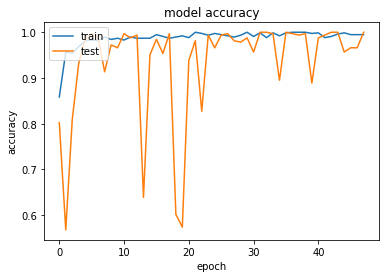

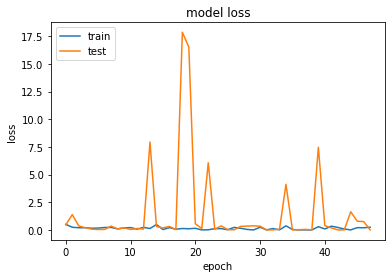

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9947575330734253
validation_accuracy 1.0


In [59]:
label = validation_generator.classes

In [60]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',

In [61]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

In [ ]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,21,21
1,8,8
All,29,29


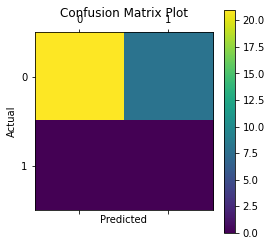

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();